# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [20]:
# Load data


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [126]:
# 1. Print the number of duplicate rows we have in our dataframe.
dp =  df.duplicated()
print(df.shape[0])
print(df[dp].shape[0])

11914
720


In [127]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()
print(df.shape)

(11194, 15)


In [128]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

df.value_counts


<bound method DataFrame.value_counts of           Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engi

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [129]:
# * Which column has the most null values and how many null values does it have?
null_counts= df.isnull().sum()
print(null_counts)


Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64


In [130]:
# * Print how long our dataframe is.
num = df.shape[0]
print(num)
 #it has 11194 rows

11194


In [131]:
# * Remove any row that has a null value in it. 
df_clean = df.dropna()
print(df_clean)


          Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driv

In [132]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

df_clean.value_counts



<bound method DataFrame.value_counts of           Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engi

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

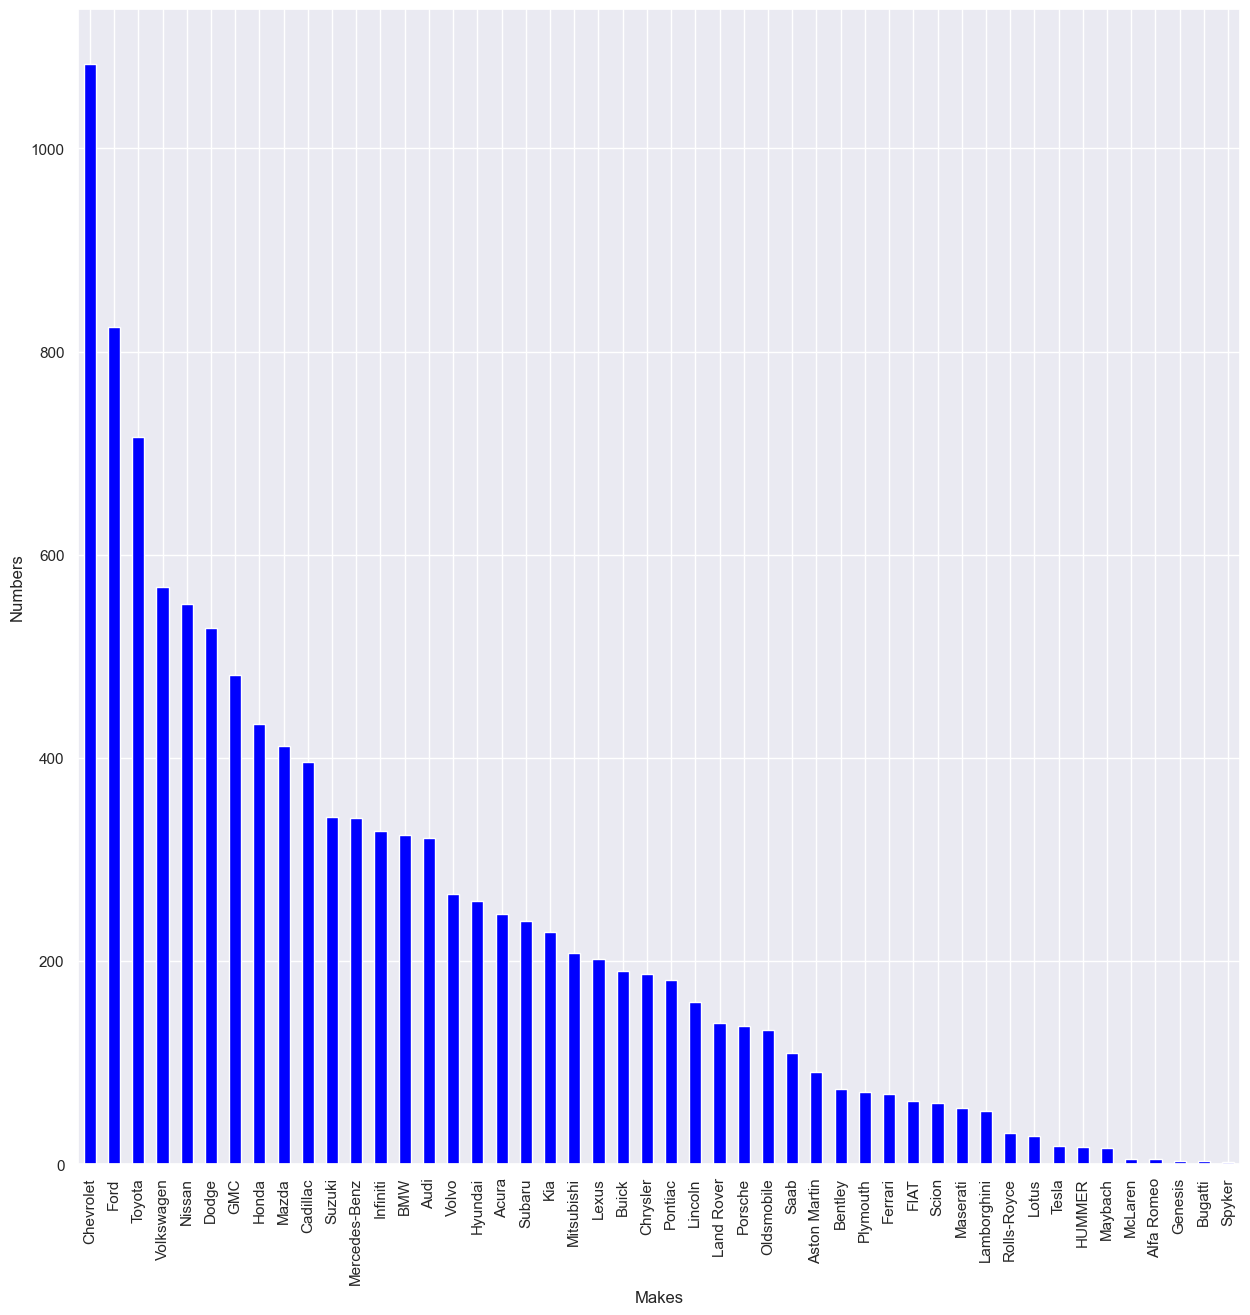

In [133]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
make = df["Make"].value_counts()
plt.figure(figsize=(15, 15))
make.plot(kind= 'bar', color = 'blue')

plt.xlabel('Makes')
plt.ylabel('Numbers')
plt.show()

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

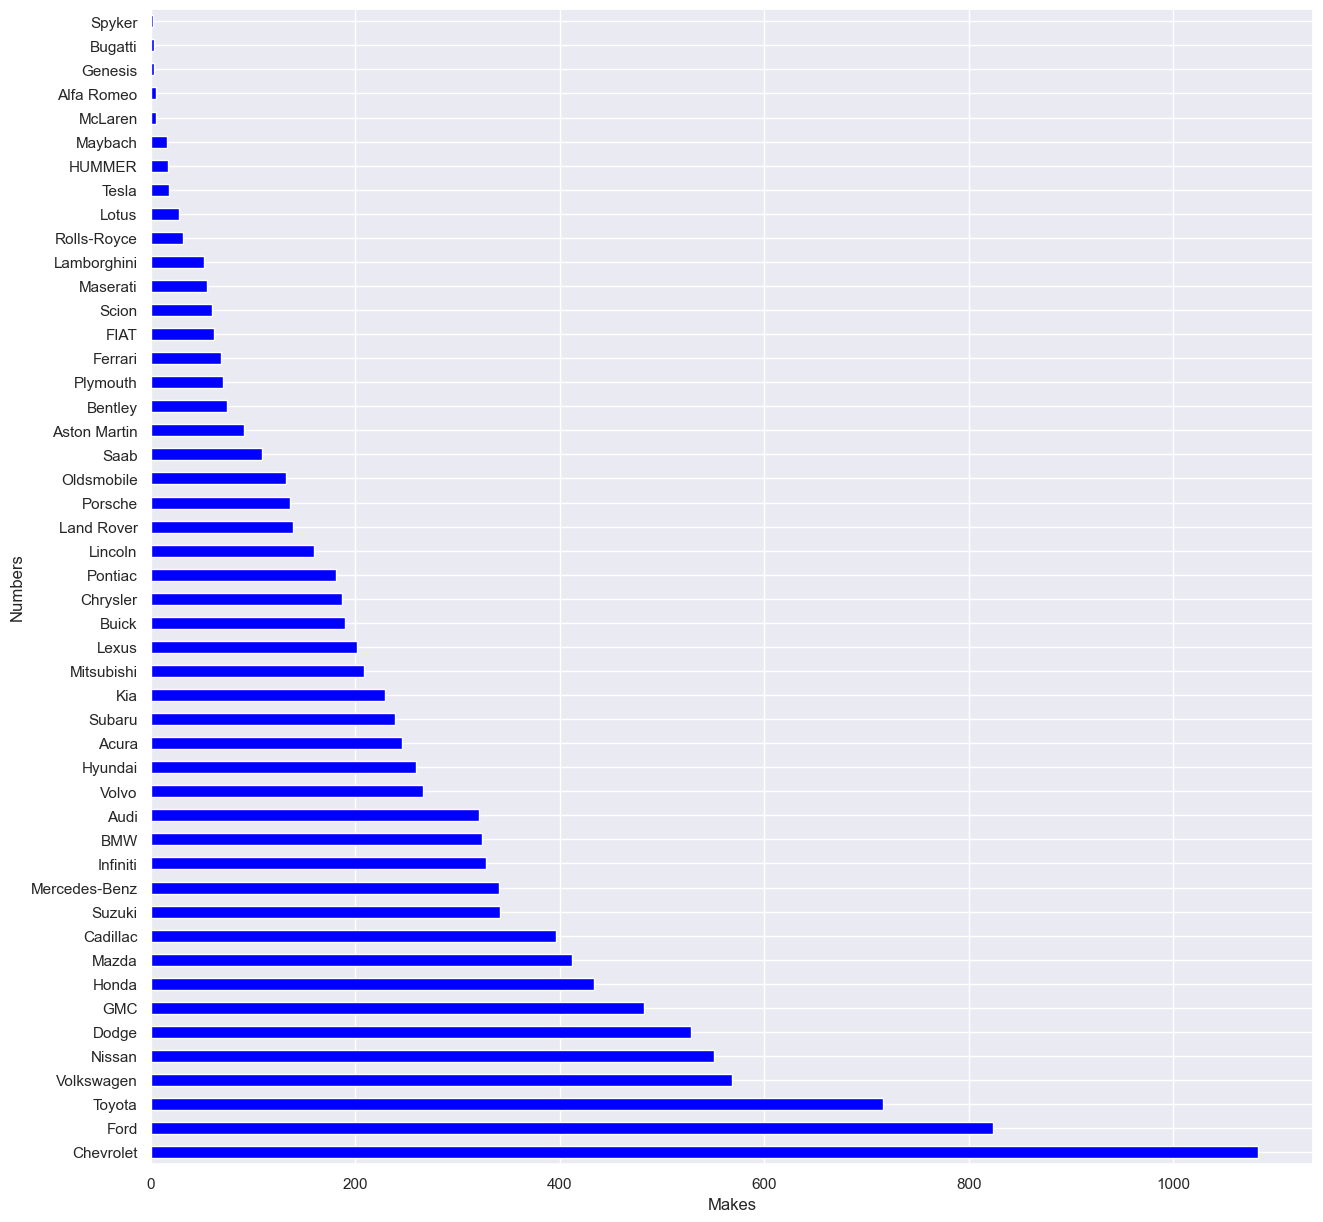

In [134]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
make = df["Make"].value_counts()
make = make.sort_values(ascending = False) #False is desending
plt.figure(figsize=(15, 15))
make.plot(kind= 'barh', color = 'blue') #h for horizontal

plt.xlabel('Makes')
plt.ylabel('Numbers')
plt.show()



# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


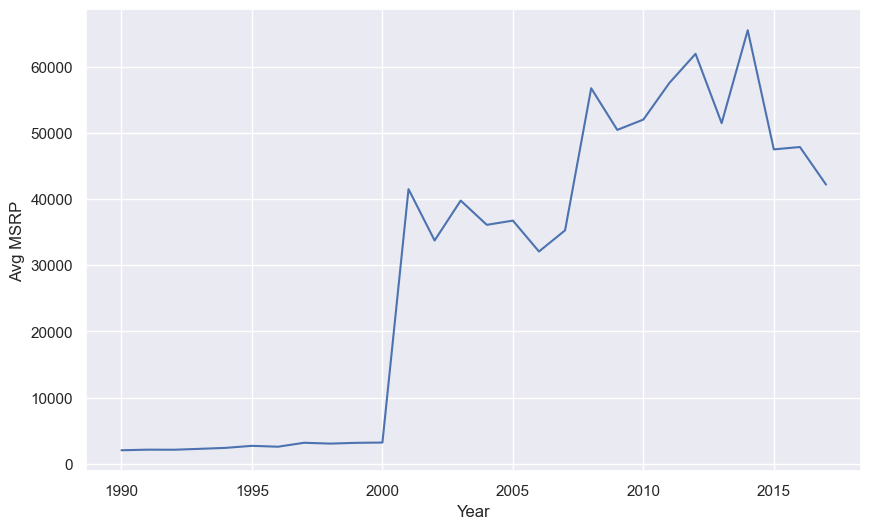

In [135]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
avg_msrp = df.groupby('Year')["MSRP"].mean()

plt.figure(figsize=(10, 6))
avg_msrp.plot()

plt.xlabel('Year')
plt.ylabel('Avg MSRP')
#plt.grid(True)
plt.show()

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [136]:
# Make a column where is 10 when year is less than 2000, else 1.
df['adjusted_price'] = np.where(df['Year'] < 2000, 10, 1)


df['adjusted_MSRP'] = df['MSRP'] * df['adjusted_price']
df.tail()

# Multiply the MSRP by the price adjuster.



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price,adjusted_MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,1,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,1,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,1,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,1,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,26,17,61,28995,1,28995


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

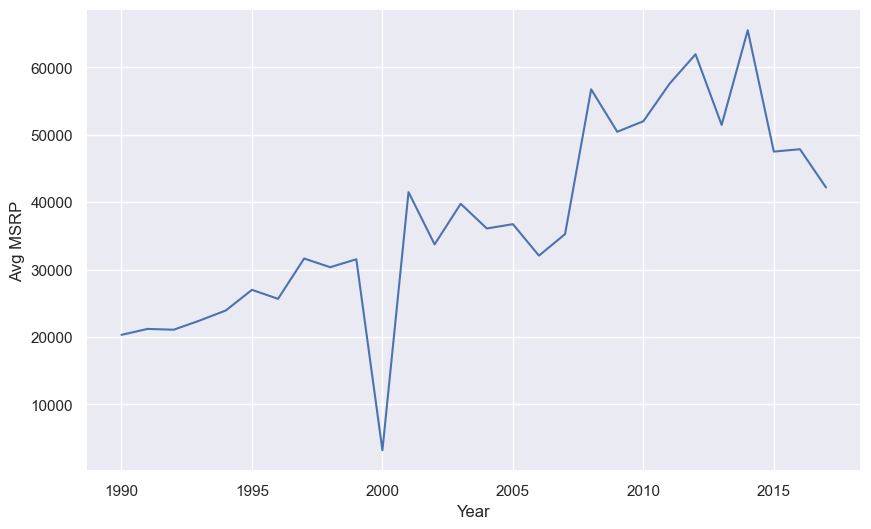

In [137]:
# Plot new prices

avg_msrp = df.groupby('Year')["adjusted_MSRP"].mean()

plt.figure(figsize=(10, 6))
avg_msrp.plot()

plt.xlabel('Year')
plt.ylabel('Avg MSRP')
plt.show()

# Plot the relationship between Engine HP and highway MPG

Text(0.5, 1.0, 'Relationship Between Engine HP & Highway MPG')

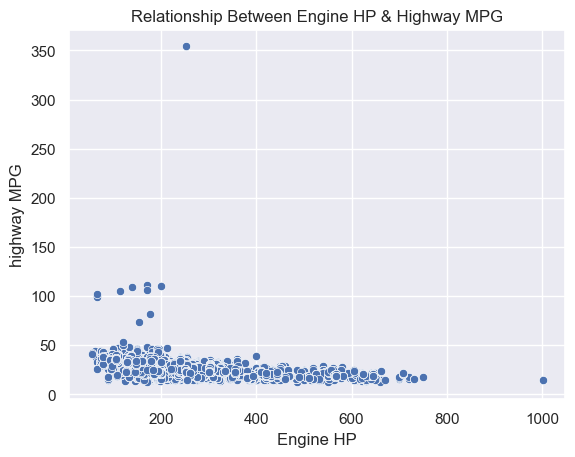

In [138]:
# Plot the relationship between Engine HP and highway MPG
relation = sns.scatterplot(data = df, x = 'Engine HP', y = 'highway MPG');

plt.title('Relationship Between Engine HP & Highway MPG')

In [139]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
outlier_engine_hp= df['Engine HP'] < 790
outlier_highway_MPG= df['highway MPG'] < 70


# Replot the relationship between Engine HP and highway MPG


C:\Users\tanmi\AppData\Local\Temp\ipykernel_24324\2177601480.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[outlier_engine_hp][outlier_highway_MPG]


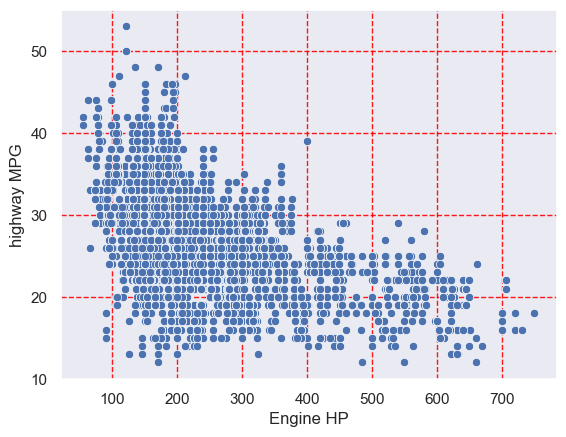

In [140]:
# Re-Plot the relationship between Engine HP and highway MPG
df = df[outlier_engine_hp][outlier_highway_MPG]
sns.scatterplot(data=df, x='Engine HP', y='highway MPG')
plt.grid(True, linestyle='--', color='red', alpha=0.9)


# Make a scatter plot of Engine HP vs highway MPG

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


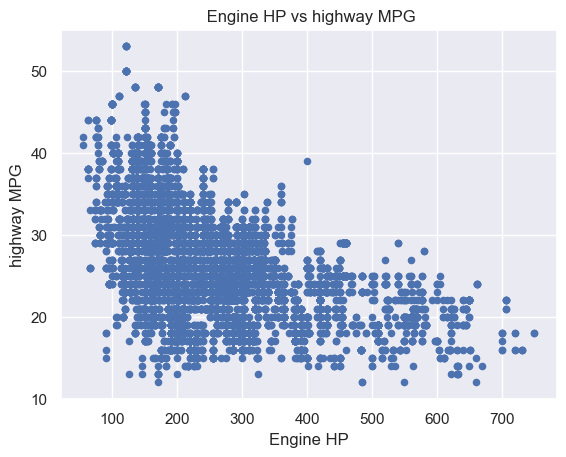

In [141]:
# Make a scatter plot of Engine HP vs highway MPG
df.plot(kind = 'scatter', x = 'Engine HP', y = 'highway MPG', title = ' Engine HP vs highway MPG' );

# What does this plot tell you about how Engine HP affects highway MPG?

In [142]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('THis is a very weak negative linear correlation. But it does reflect that as the Engine HP increase the MPG on highwat decrease!')

THis is a very weak negative linear correlation. But it does reflect that as the Engine HP increase the MPG on highwat decrease!


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

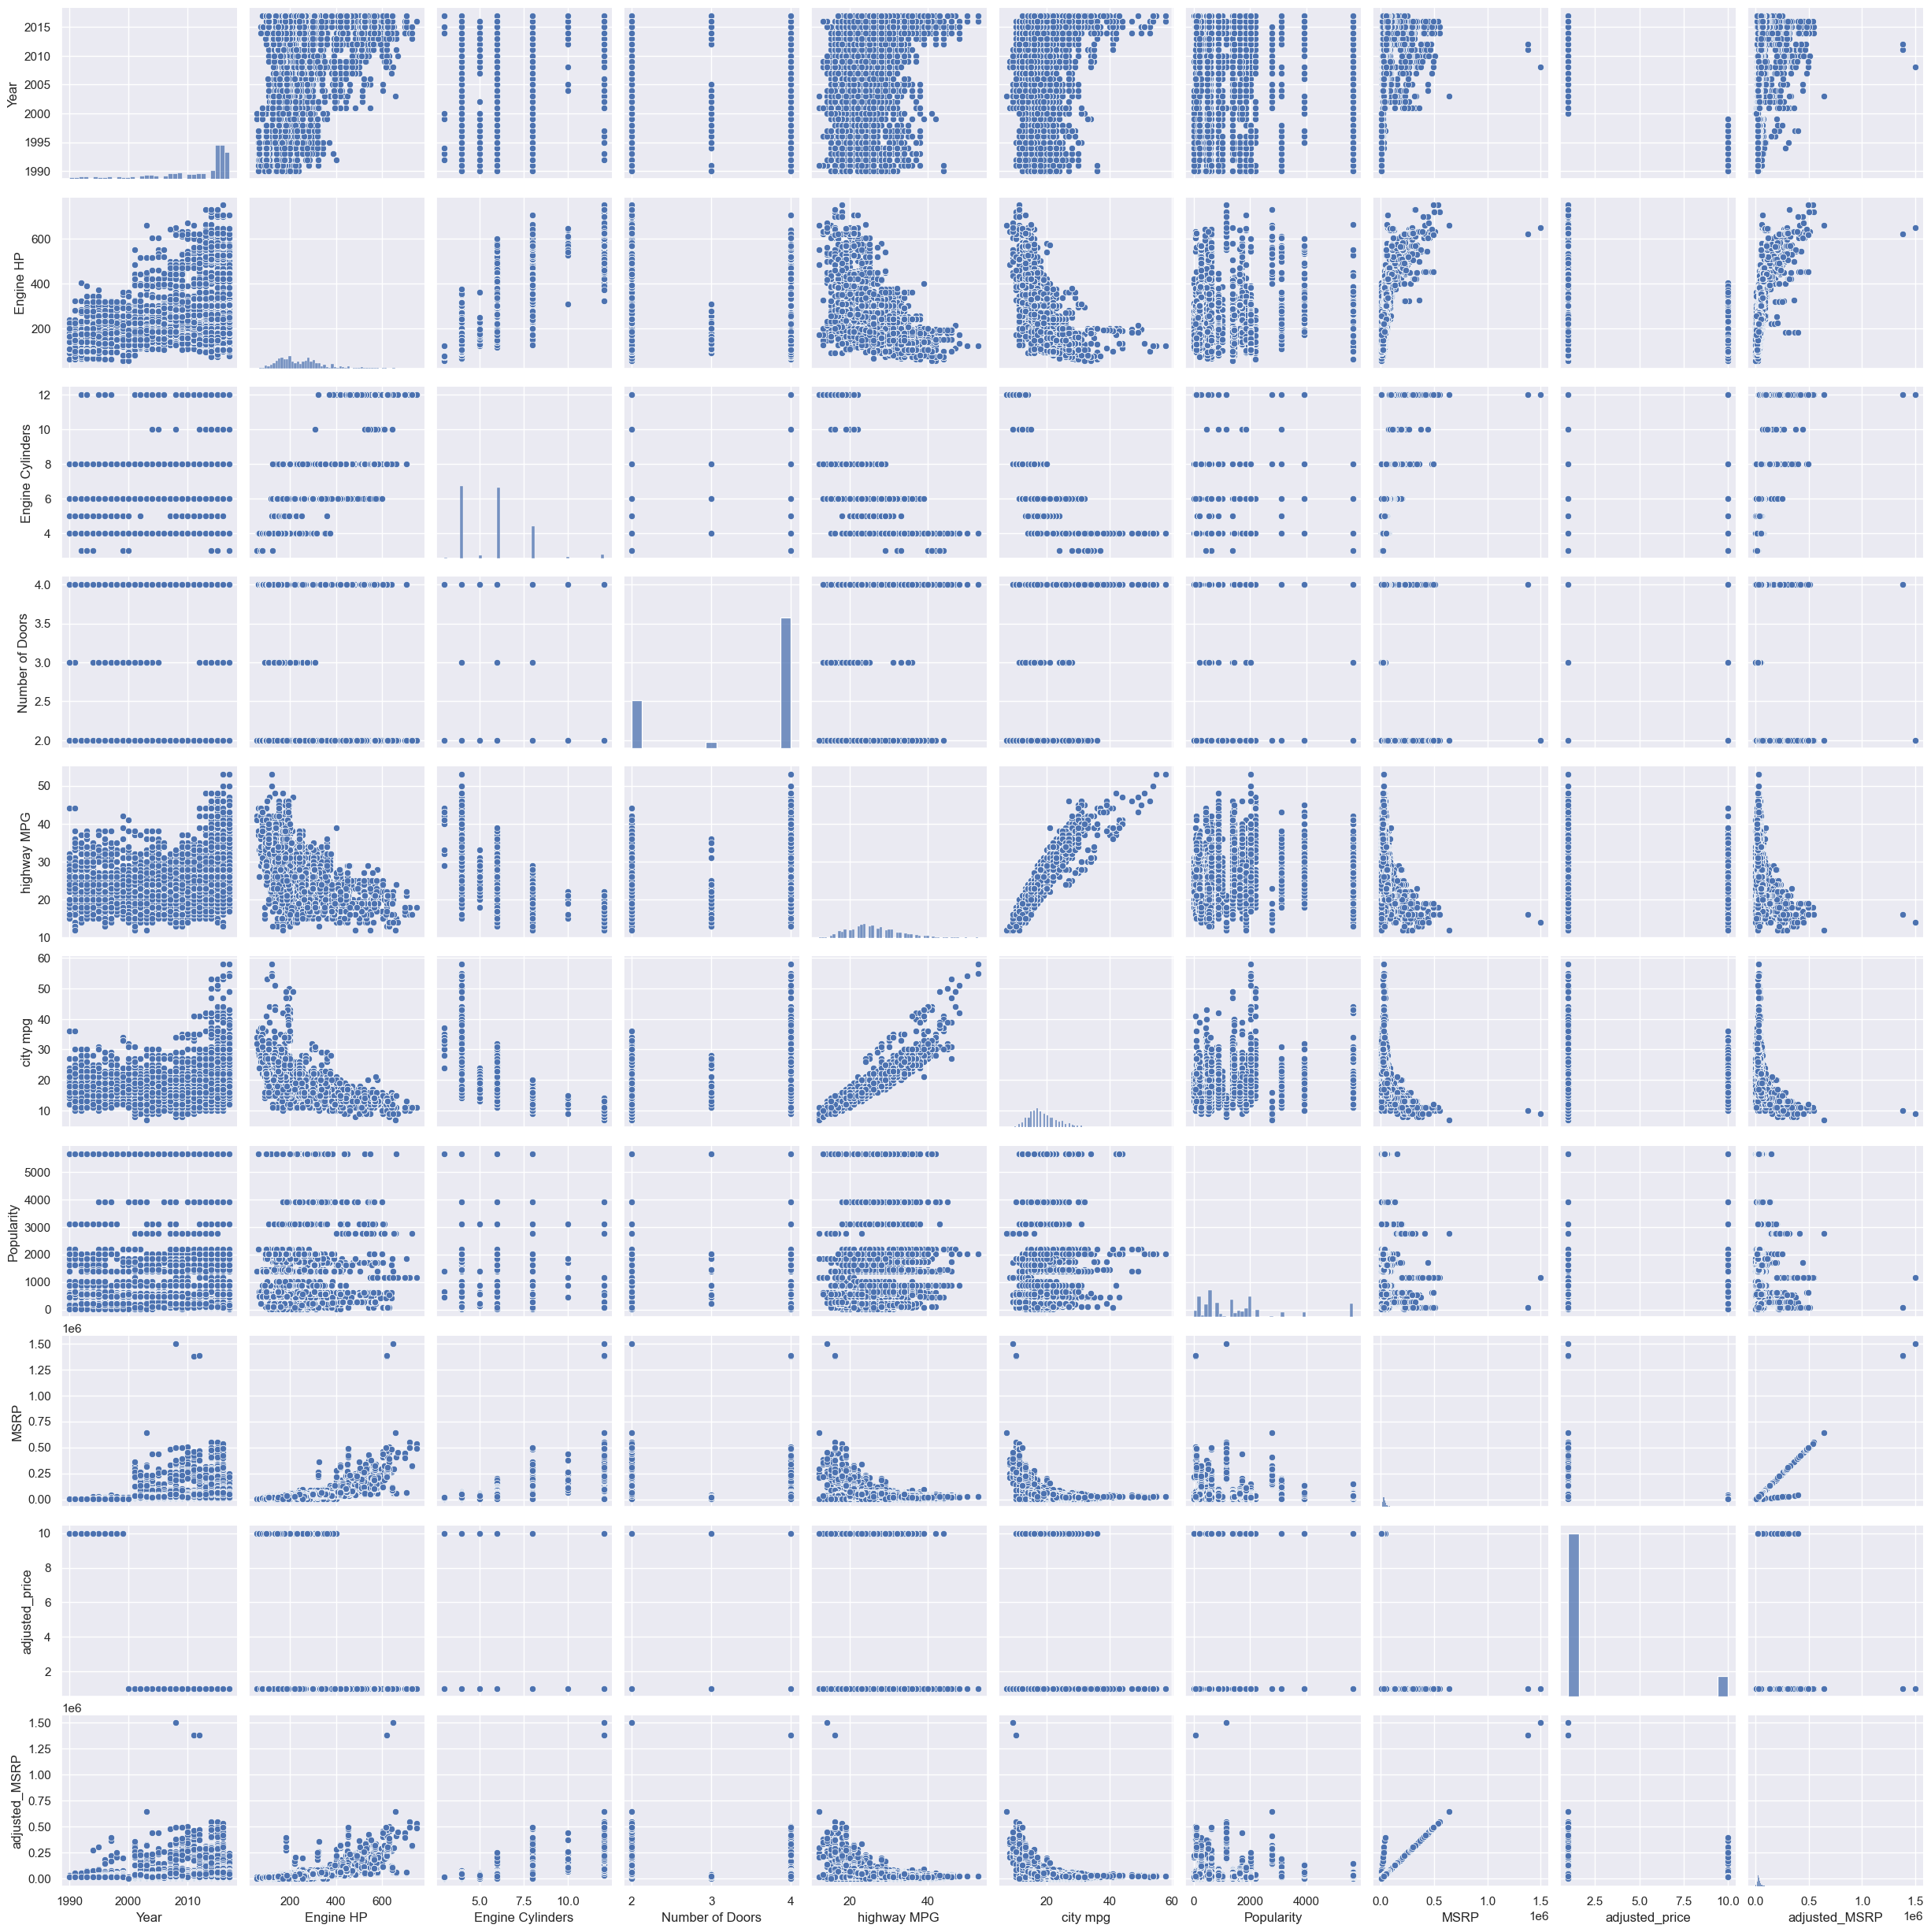

In [143]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)


In [144]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('city MPG & highway MPG')


city MPG & highway MPG


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

In [149]:
df = df.drop(columns = ['adjusted_MSRP'])
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.340694,-0.023959,0.245723,0.303498,0.246052,0.086986,0.239026
Engine HP,0.340694,1.000000,0.788178,-0.126249,-0.493206,-0.542337,0.043540,0.690141
Engine Cylinders,-0.023959,0.788178,1.000000,-0.144449,-0.688410,-0.686342,0.045137,0.579069
Number of Doors,0.245723,-0.126249,-0.144449,1.000000,0.126350,0.147867,-0.060182,-0.150040
highway MPG,0.303498,-0.493206,-0.688410,0.126350,1.000000,0.918931,-0.039799,-0.262225
city mpg,0.246052,-0.542337,-0.686342,0.147867,0.918931,1.000000,-0.016949,-0.290044
Popularity,0.086986,0.043540,0.045137,-0.060182,-0.039799,-0.016949,1.000000,-0.049506
MSRP,0.239026,0.690141,0.579069,-0.150040,-0.262225,-0.290044,-0.049506,1.000000


<AxesSubplot:>

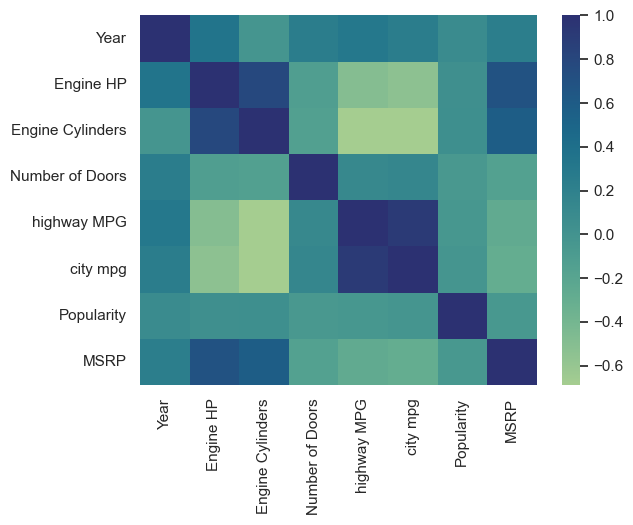

In [152]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

df.corr()
sns.heatmap(df.corr(), cmap = "crest")

In [153]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('MRSP and Engine MSRP')

MRSP and Engine MSRP


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 




In [154]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
